# Objectives
Clean the health records and validate the business logic of the data.

# Data Understanding And Preparation

In [208]:
import pandas as pd 

# load the csv file
df = pd.read_csv('hospital_patients_real_world.csv')

df

,PatientID,Age,Gender,Diagnosis,AdmissionDate,DischargeDate,HospitalID
0,PN-2021066,7.0,Other,Myocardial Infarction,2024-03-23,2024-03-29,HOSP-65
1,PN-4606019,36.0,Other,Pneumonia,2024-08-01,2024-08-07,HOSP-79
2,PN-2594016,70.0,Other,Influenza,2024-11-16,2024-11-23,HOSP-27
3,PN-6906914,90.0,Unknown,Acute Bronchitis,2025-07-05,2025-07-10,HOSP-64
4,PN-4656204,0.0,Female,Type 2 Diabetes,2023-08-30,2023-08-31,HOSP-31
...,...,...,...,...,...,...,...
4995,PN-3536392,22.0,Female,NaN,2024-03-14,2024-03-18,HOSP-14
4996,PN-8451961,NaN,Other,Myocardial Infarction,2025-03-20,2025-03-21,HOSP-29
4997,PN-3076032,0.0,Male,Urinary Tract Infection,2023-10-28,2023-10-31,HOSP-83
4998,PN-1714852,29.0,Other,Urinary Tract Infection,2024-08-09,2024-08-16,HOSP-64


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PatientID      5000 non-null   object 
 1   Age            4650 non-null   float64
 2   Gender         4650 non-null   object 
 3   Diagnosis      4650 non-null   object 
 4   AdmissionDate  5000 non-null   object 
 5   DischargeDate  5000 non-null   object 
 6   HospitalID     5000 non-null   object 
dtypes: float64(1), object(6)
memory usage: 273.6+ KB


In [210]:
# changing the dtype
df['AdmissionDate'] = pd.to_datetime(df['AdmissionDate'])
df['DischargeDate'] = pd.to_datetime(df['DischargeDate'])
df = df.astype({'Gender':'string','Diagnosis':'string'})

df.dtypes

PatientID                object
Age                     float64
Gender           string[python]
Diagnosis        string[python]
AdmissionDate    datetime64[ns]
DischargeDate    datetime64[ns]
HospitalID               object
dtype: object

In [211]:
# remove the null values 
df = df.dropna()

In [212]:
# checks for duplicate values
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4992    False
4993    False
4997    False
4998    False
4999    False
Length: 4005, dtype: bool

In [213]:
df['Gender'].value_counts()

Gender
Other      1033
Female     1012
Unknown    1002
Male        958
Name: count, dtype: Int64

In [214]:
# drop the gender column
df = df.drop(columns=['Gender'])

In [215]:
# Detecting invalid date relationship(discharge before admission)

df=df[df['DischargeDate'] >= df['AdmissionDate']].copy()
df

,PatientID,Age,Diagnosis,AdmissionDate,DischargeDate,HospitalID
0,PN-2021066,7.0,Myocardial Infarction,2024-03-23,2024-03-29,HOSP-65
1,PN-4606019,36.0,Pneumonia,2024-08-01,2024-08-07,HOSP-79
2,PN-2594016,70.0,Influenza,2024-11-16,2024-11-23,HOSP-27
3,PN-6906914,90.0,Acute Bronchitis,2025-07-05,2025-07-10,HOSP-64
4,PN-4656204,0.0,Type 2 Diabetes,2023-08-30,2023-08-31,HOSP-31
...,...,...,...,...,...,...
4991,PN-3897363,41.0,Gastroenteritis,2024-08-30,2024-09-08,HOSP-23
4992,PN-3124888,5.0,Hypertension,2023-12-11,2023-12-17,HOSP-77
4993,PN-1433401,76.0,Cholelithiasis,2024-11-03,2024-11-04,HOSP-65
4997,PN-3076032,0.0,Urinary Tract Infection,2023-10-28,2023-10-31,HOSP-83


# Data Analysis

In [216]:
import matplotlib.pyplot as plt

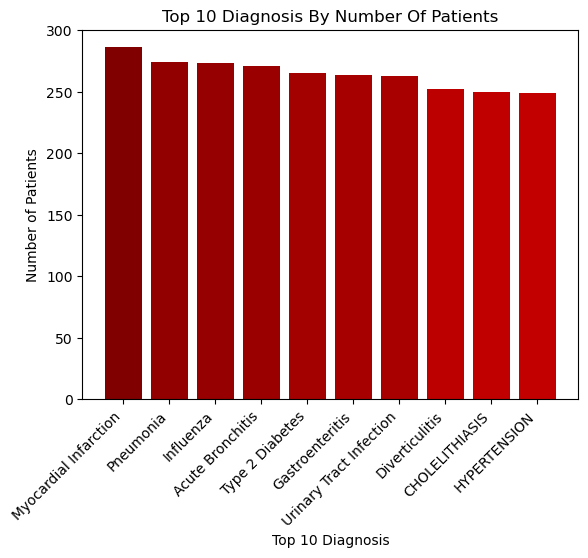

In [217]:
x = df['Diagnosis'].values.value_counts().head(10).index
y = df['Diagnosis'].value_counts().head(10).values
colors = plt.cm.seismic(y/max(y))
plt.bar(x,y,color=colors)
plt.xlabel('Top 10 Diagnosis')
plt.xticks(rotation=45,ha='right')
plt.ylabel('Number of Patients')
plt.title('Top 10 Diagnosis By Number Of Patients')
plt.show()

In [218]:
bins = [0,12,19,39,59,100]
labels = ['Child','Teenager','Young Adult','Middle-Aged','Senior']
df['Age_Group'] = pd.cut(df['Age'],bins=bins,labels=labels,right=True)
df

,PatientID,Age,Diagnosis,AdmissionDate,DischargeDate,HospitalID,Age_Group
0,PN-2021066,7.0,Myocardial Infarction,2024-03-23,2024-03-29,HOSP-65,Child
1,PN-4606019,36.0,Pneumonia,2024-08-01,2024-08-07,HOSP-79,Young Adult
2,PN-2594016,70.0,Influenza,2024-11-16,2024-11-23,HOSP-27,Senior
3,PN-6906914,90.0,Acute Bronchitis,2025-07-05,2025-07-10,HOSP-64,Senior
4,PN-4656204,0.0,Type 2 Diabetes,2023-08-30,2023-08-31,HOSP-31,NaN
...,...,...,...,...,...,...,...
4991,PN-3897363,41.0,Gastroenteritis,2024-08-30,2024-09-08,HOSP-23,Middle-Aged
4992,PN-3124888,5.0,Hypertension,2023-12-11,2023-12-17,HOSP-77,Child
4993,PN-1433401,76.0,Cholelithiasis,2024-11-03,2024-11-04,HOSP-65,Senior
4997,PN-3076032,0.0,Urinary Tract Infection,2023-10-28,2023-10-31,HOSP-83,NaN


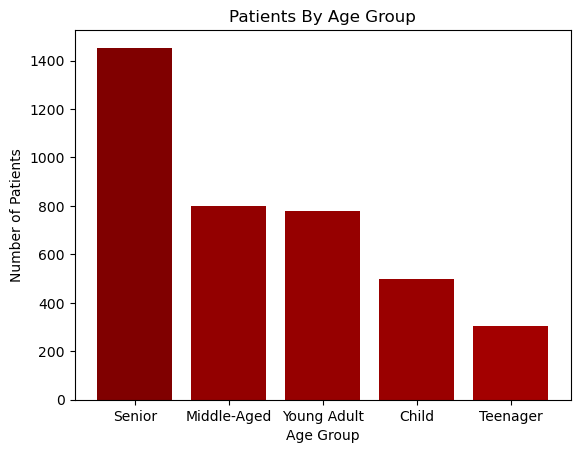

In [219]:
x = df['Age_Group'].value_counts().index
y = df['Age_Group'].value_counts().values
plt.bar(x,y,color=colors)
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.title('Patients By Age Group')
plt.show()